In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

/Users/juliasbardelatti/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [15]:
df = pd.read_csv("./0_ate_5/analise_geral/analise_geral.csv")
df_regioes = df[df['regiao'].str.startswith(('TOTAL BRASIL'), na=False)]

In [16]:
colunas_para_converter = ['perc_magreza_acentuada', 'perc_magreza', 'perc_eutrofia', 'perc_risco_sobrepeso', 'perc_sobrepeso', 'perc_obesidade'] 

for coluna in colunas_para_converter:
    df_regioes[coluna] = pd.to_numeric(df_regioes[coluna], errors='coerce') 

In [17]:
df_regioes['perc_total_obesidade'] = (df_regioes['perc_sobrepeso'] +  df_regioes['perc_obesidade'])
df_regioes['perc_total_desnutricao'] = (df_regioes['perc_magreza_acentuada'] + df_regioes['perc_magreza'])

In [22]:
df_regioes[['ano', 'perc_total_obesidade', 'perc_total_desnutricao', 'qtd_magreza_acentuada', 'qtd_magreza', 'qtd_sobrepeso', 'qtd_obesidade', 'total']]

,ano,perc_total_obesidade,perc_total_desnutricao,qtd_magreza_acentuada,qtd_magreza,qtd_sobrepeso,qtd_obesidade,total
5603,2014,0.1770,0.0692,157.825,131.785,367.545,372.486,4.181.910
11207,2015,0.1640,0.0617,143.354,141.622,408.339,349.079,4.620.006
16811,2016,0.1662,0.0643,162.855,147.921,410.849,391.394,4.827.198
22415,2017,0.1584,0.0606,143.225,146.408,415.889,340.407,4.777.186
28019,2018,0.1570,0.0562,138.376,145.634,444.066,349.180,5.051.005
33623,2019,0.1477,0.0690,164.670,175.711,385.558,342.993,4.932.102
39227,2020,0.1588,0.0612,109.538,120.621,319.472,278.144,3.763.293
44831,2021,0.1575,0.0644,138.009,153.617,370.079,343.249,4.529.168
50435,2022,0.1424,0.0604,177.238,202.200,496.358,399.276,6.287.346
56039,2023,0.1367,0.0552,179.856,222.002,572.161,422.847,7.276.985


In [20]:
df_regioes[['ano', 'perc_total_obesidade', 'perc_total_desnutricao', 'qtd_magreza_acentuada', 'qtd_magreza', 'qtd_sobrepeso', 'qtd_obesidade', 'total']].to_clipboard()

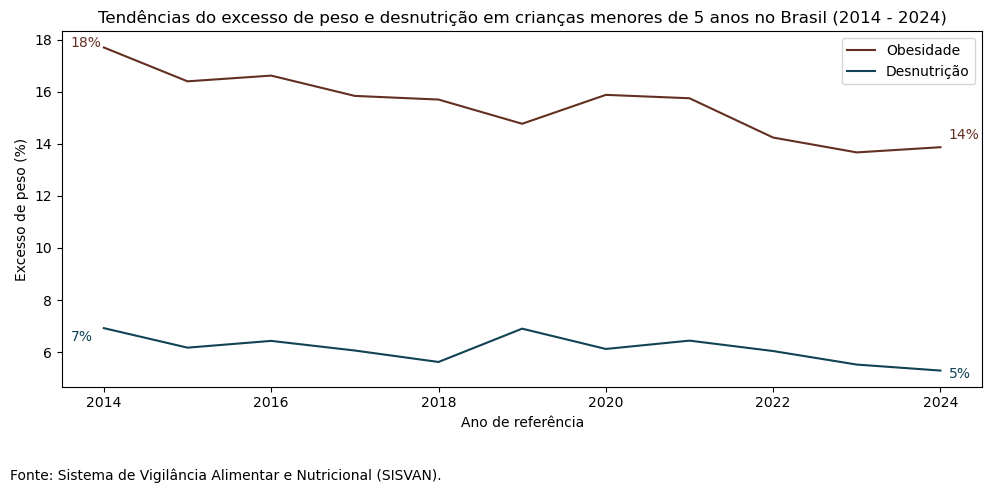

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(df_regioes['ano'], df_regioes['perc_total_obesidade'], label='Obesidade', color='#632F21')
plt.plot(df_regioes['ano'], df_regioes['perc_total_desnutricao'], label='Desnutrição', color='#114354')

plt.text(2014 - 0.4, df_regioes.loc[df_regioes['ano'] == 2014, 'perc_total_obesidade'].values[0] + 0,
         f"{df_regioes.loc[df_regioes['ano'] == 2014, 'perc_total_obesidade'].values[0]:.0f}%", 
         color='#632F21', fontsize=10, bbox=dict(facecolor='white', edgecolor='none', pad=0.5))

plt.text(2024 + 0.1, df_regioes.loc[df_regioes['ano'] == 2024, 'perc_total_obesidade'].values[0] + 0.3,
         f"{df_regioes.loc[df_regioes['ano'] == 2024, 'perc_total_obesidade'].values[0]:.0f}%", 
         color='#632F21', fontsize=10, bbox=dict(facecolor='white', edgecolor='none', pad=0.5))

plt.text(2014 - 0.4, df_regioes.loc[df_regioes['ano'] == 2014, 'perc_total_desnutricao'].values[0] - 0.5,
         f"{df_regioes.loc[df_regioes['ano'] == 2014, 'perc_total_desnutricao'].values[0]:.0f}%", 
         color='#114354', fontsize=10, bbox=dict(facecolor='white', edgecolor='none', pad=0.5))

plt.text(2024 + 0.1, df_regioes.loc[df_regioes['ano'] == 2024, 'perc_total_desnutricao'].values[0] - 0.3,
         f"{df_regioes.loc[df_regioes['ano'] == 2024, 'perc_total_desnutricao'].values[0]:.0f}%", 
         color='#114354', fontsize=10, bbox=dict(facecolor='white', edgecolor='none', pad=0.5))

plt.title('Tendências do excesso de peso e desnutrição em crianças menores de 5 anos no Brasil (2014 - 2024)')
plt.xlabel('Ano de referência')
plt.ylabel('Excesso de peso (%)')
plt.legend()
plt.figtext(0.01, -0.02, "Fonte: Sistema de Vigilância Alimentar e Nutricional (SISVAN).", ha="left", fontsize=10)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])  
plt.show()
